# 第1章 统计学习方法概论

1．统计学习是关于计算机基于数据构建概率统计模型并运用模型对数据进行分析与预测的一门学科。统计学习包括监督学习、非监督学习、半监督学习和强化学习。

2．统计学习方法三要素——模型、策略、算法，对理解统计学习方法起到提纲挈领的作用。

3．本书主要讨论监督学习，监督学习可以概括如下：从给定有限的训练数据出发， 假设数据是独立同分布的，而且假设模型属于某个假设空间，应用某一评价准则，从假设空间中选取一个最优的模型，使它对已给训练数据及未知测试数据在给定评价标准意义下有最准确的预测。

4．统计学习中，进行模型选择或者说提高学习的泛化能力是一个重要问题。如果只考虑减少训练误差，就可能产生过拟合现象。模型选择的方法有正则化与交叉验证。学习方法泛化能力的分析是统计学习理论研究的重要课题。

5．分类问题、标注问题和回归问题都是监督学习的重要问题。本书中介绍的统计学习方法包括感知机、$k$近邻法、朴素贝叶斯法、决策树、逻辑斯谛回归与最大熵模型、支持向量机、提升方法、EM算法、隐马尔可夫模型和条件随机场。这些方法是主要的分类、标注以及回归方法。它们又可以归类为生成方法与判别方法。


### 使用最小二乘法拟和曲线

高斯于1823年在误差$e_1,…,e_n$独立同分布的假定下,证明了最小二乘方法的一个最优性质: 在所有无偏的线性估计类中,最小二乘方法是其中方差最小的！
对于数据$(x_i, y_i)   (i=1, 2, 3...,m)$

拟合出函数$h(x)$

有误差，即残差：$r_i=h(x_i)-y_i$

此时$L2$范数(残差平方和)最小时，$h(x)$ 和 $y$ 相似度最高，更拟合

一般的$H(x)$为$n$次的多项式，$H(x)=w_0+w_1x+w_2x^2+...w_nx^n$

$w(w_0,w_1,w_2,...,w_n)$为参数

最小二乘法就是要找到一组 $w(w_0,w_1,w_2,...,w_n)$ ，使得$\sum_{i=1}^n(h(x_i)-y_i)^2$ (残差平方和) 最小

即，求 $min\sum_{i=1}^n(h(x_i)-y_i)^2$

----

举例：我们用目标函数$y=sin2{\pi}x$, 加上一个正态分布的噪音干扰，用多项式去拟合【例1.1 11页】

In [17]:
import numpy as np
import scipy as sp # 基于numpy的科学计算库
from scipy.optimize import leastsq  # 从优化库中导入最小二乘法算法的函数，用于拟合模型参数
import matplotlib.pyplot as plt 

%matplotlib inline 
# 在jupyter notebook中显示图像

* ps: numpy.poly1d([1,2,3])  生成  $1x^2+2x^1+3x^0$ ，提供的系数是从高阶到低阶
* 现在修改为numpy.polynomial.Polynomial([1,2,3]) 生成 $1x^2+2x^1+3x^0$，提供的系数是从低阶到高阶 

In [ ]:
np.poly1d([1,2,3]) 
print(np.poly1d([1,2,3]))

   2
1 x + 2 x + 3


In [11]:
?np.polynomial.Polynomial

Init signature: np.polynomial.Polynomial(coef, domain=None, window=None, symbol='x')
Docstring:     
A power series class.

The Polynomial class provides the standard Python numerical methods
'+', '-', '*', '//', '%', 'divmod', '**', and '()' as well as the
attributes and methods listed below.

Parameters
----------
coef : array_like
    Polynomial coefficients in order of increasing degree, i.e.,
    ``(1, 2, 3)`` give ``1 + 2*x + 3*x**2``.
domain : (2,) array_like, optional
    Domain to use. The interval ``[domain[0], domain[1]]`` is mapped
    to the interval ``[window[0], window[1]]`` by shifting and scaling.
    The default value is [-1., 1.].
window : (2,) array_like, optional
    Window, see `domain` for its use. The default value is [-1., 1.].
symbol : str, optional
    Symbol used to represent the independent variable in string
    representations of the polynomial expression, e.g. for printing.
    The symbol must be a valid Python identifier. Default value is 'x'.

    .. v

In [18]:
from numpy.polynomial import Polynomial
p = Polynomial([1,2,3])

# 打印多项式
print(p)

# 计算多项式在某些点的值，例如 x = 0, 1, 2
x_values=[0,1,2]
y_values=p(x_values)
print("P(x) values:", y_values)

1.0 + 2.0·x + 3.0·x²
P(x) values: [ 1.  6. 17.]


In [14]:
# 使用一个多项式函数去拟合对应正弦函数

# 目标函数
def real_func(x):
    return np.sin(2*np.pi*x)
    # 返回正弦函数sin(2πx)


# 多项式
def fit_func(p, x):
    f = np.poly1d(p) # 注意是从高阶到低阶
    return f(x)

# 如果是新版的多项式函数，则为
def fit_func_new(p,x):
    f = Polynomial(p) # 提供多项式系数list，注意是从低阶到高阶
    return f(x) # 提供多项式的输入x值


# 残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret


# 同样的，对应新版的多项式函数
def residuals_func_new(p,x,y):
    ret = fit_func_new(p,x)-y
    return ret

In [ ]:
?np.linspace # 返回起点和终点之间的等差数列，num表示数列的个数

Signature:      
np.linspace(
    start,
    stop,
    num=50,
    endpoint=True,
    retstep=False,
    dtype=None,
    axis=0,
    *,
    device=None,
)
Call signature:  np.linspace(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function linspace at 0x7fae9c3ca980>
File:            ~/miniconda3/envs/r-jupyter/lib/python3.13/site-packages/numpy/_core/function_base.py
Docstring:      
Return evenly spaced numbers over a specified interval.

Returns `num` evenly spaced samples, calculated over the
interval [`start`, `stop`].

The endpoint of the interval can optionally be excluded.

.. versionchanged:: 1.20.0
    Values are rounded towards ``-inf`` instead of ``0`` when an
    integer ``dtype`` is specified. The old behavior can
    still be obtained with ``np.linspace(start, stop, num).astype(int)``

Parameters
----------
start : array_like
    The starting value of the sequence.
stop : array_like
    The end value of the sequence, unless `endpoint` is set

In [ ]:
?np.random.normal # 生成正态分布的随机数，主要提供的参数就是均值和标准差，以及生成的个数，默认是1个

Signature: np.random.normal(loc=0.0, scale=1.0, size=None)
Docstring:
normal(loc=0.0, scale=1.0, size=None)

Draw random samples from a normal (Gaussian) distribution.

The probability density function of the normal distribution, first
derived by De Moivre and 200 years later by both Gauss and Laplace
independently [2]_, is often called the bell curve because of
its characteristic shape (see the example below).

The normal distributions occurs often in nature.  For example, it
describes the commonly occurring distribution of samples influenced
by a large number of tiny, random disturbances, each with its own
unique distribution [2]_.

.. note::
    New code should use the `~numpy.random.Generator.normal`
    method of a `~numpy.random.Generator` instance instead;
    please see the :ref:`random-quick-start`.

Parameters
----------
loc : float or array_like of floats
    Mean ("centre") of the distribution.
scale : float or array_like of floats
    Standard deviation (spread or "width")

In [25]:
np.random.normal(0,1,10) # 生成10个均值为0，标准差为1的正态分布随机数

array([ 0.95620391, -0.11558998, -1.24027012, -0.87308397, -0.54550483,
       -1.36618996, -0.70399166, -0.02560408,  1.33259555, -0.46670548])

In [ ]:
?np.random.rand # 生成[0,1)之间的随机数，参数为生成的个数（数组形式）

Signature: np.random.rand(*args)
Docstring:
rand(d0, d1, ..., dn)

Random values in a given shape.

.. note::
    This is a convenience function for users porting code from Matlab,
    and wraps `random_sample`. That function takes a
    tuple to specify the size of the output, which is consistent with
    other NumPy functions like `numpy.zeros` and `numpy.ones`.

Create an array of the given shape and populate it with
random samples from a uniform distribution
over ``[0, 1)``.

Parameters
----------
d0, d1, ..., dn : int, optional
    The dimensions of the returned array, must be non-negative.
    If no argument is given a single Python float is returned.

Returns
-------
out : ndarray, shape ``(d0, d1, ..., dn)``
    Random values.

See Also
--------
random

Examples
--------
>>> np.random.rand(3,2)
array([[ 0.14022471,  0.96360618],  #random
       [ 0.37601032,  0.25528411],  #random
       [ 0.49313049,  0.94909878]]) #random
Type:      method

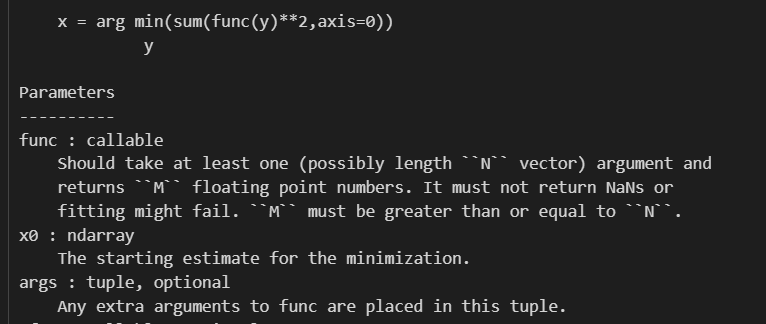

leastsq中需要提供的参数，1个是平方损失函数func（但是还没有进行平方处理），实际上就是残差函数，定义了要拟合的误差error；

1个是初始化的参数，还有1个就是要传递给func的其他参数

我们实际上的残差函数residuals_fun，需要提供的是3个参数，p, x, y；

其中p是我们提供的模型的系数，而（x，y）是需要提供以供于最小化残差的训练数据

In [ ]:
?leastsq

Signature:
leastsq(
    func,
    x0,
    args=(),
    Dfun=None,
    full_output=False,
    col_deriv=False,
    ftol=1.49012e-08,
    xtol=1.49012e-08,
    gtol=0.0,
    maxfev=0,
    epsfcn=None,
    factor=100,
    diag=None,
)
Docstring:
Minimize the sum of squares of a set of equations.

::

    x = arg min(sum(func(y)**2,axis=0))
             y

Parameters
----------
func : callable
    Should take at least one (possibly length ``N`` vector) argument and
    returns ``M`` floating point numbers. It must not return NaNs or
    fitting might fail. ``M`` must be greater than or equal to ``N``.
x0 : ndarray
    The starting estimate for the minimization.
args : tuple, optional
    Any extra arguments to func are placed in this tuple.
Dfun : callable, optional
    A function or method to compute the Jacobian of func with derivatives
    across the rows. If this is None, the Jacobian will be estimated.
full_output : bool, optional
    If ``True``, return all optional outputs (not just

In [15]:
# 十个点
x = np.linspace(0, 1, 10) # 返回一个等差数列，从0到1，共10个点
x_points = np.linspace(0, 1, 1000)
# 加上正态分布噪音的目标函数的值 
y_ = real_func(x) # 正弦函数值，也就是目标函数值
# 加上正态分布噪音
np.random.seed(0)
y = [np.random.normal(0, 0.1) + y1 for y1 in y_] # 返回的y list是增加了均值为0，标准差为0.1的正态分布噪音的目标函数值


def fitting(M=0):
    """
    M    为 多项式的次数
    """
    # 随机初始化多项式参数，如果次数是0，则只有一个参数，即截距，但是也需要生成1个随机系数；
    # 如果次数是1，则有两个参数，即截距和斜率，也就是是一次项的线性函数，这个时候需要生成2个随机系数，分别对应截距和斜率
    # 以此类推，如果我们要生成的是M次多项式，包括上常数项，我们得生成M+1个随机系数
    p_init = np.random.rand(M + 1)  
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))  
    # 注意这里的p_init是多项式的系数，仅仅是用于初始化最小二乘法的参数，不是最终的拟合参数，因为最小二乘法是一个动态迭代的过程，必须得有一个初始值
    # 然后这里提供的训练集（x，y）实际上就是前面的10个数据点
    print('Fitting Parameters:', p_lsq[0])
    # 然后leastsq中返回的第1个参数实际上就是最优拟合参数（实际上就是优化后的多项式系数）
    
    
    # 注意下面这一部分其实是新版的多项式的拟合，本质上和上面的是一样的，拟合都是同样次数的多项式，只不过对初始化系数的使用可能因为参数使用高低阶传入有所不同
    p_lsq_new = leastsq(residuals_func_new,p_init,args=(x,y))
    print('Fitting Parameters with new polynomial:',p_lsq_new[0])


    # 可视化
    # 说白了就是上面使用10个数据点拟合出来的多项式函数，然后使用1000个数据点来展示这个拟合的多项式函数
    plt.plot(x_points, real_func(x_points), label='real') # 真实的正弦函数，1000个数据点展示
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve') # 拟合的多项式函数，1000个数据点展示，为了绘图平滑
    
    
    # 注意这里也是对应上面的新版多项式的拟合
    plt.plot(x_points,fit_func_new(p_lsq_new[0],x_points),label='fitted curve with new polynomial')
    
    
    plt.plot(x, y, 'bo', label='noise') # 蓝色的圆点，10个数据点展示
    plt.legend() 
    return p_lsq,p_lsq_new # 返回拟合的多项式结果，具体可以查看?

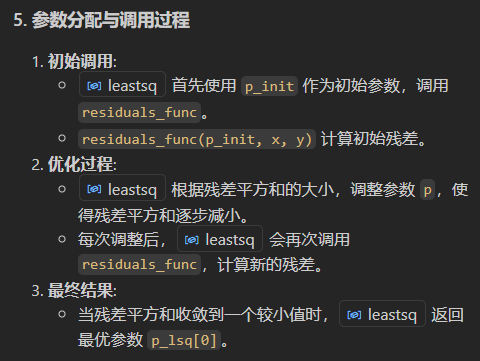

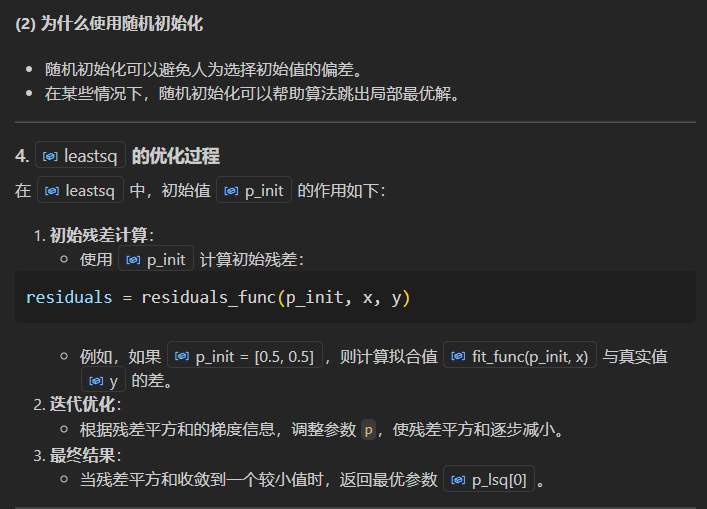

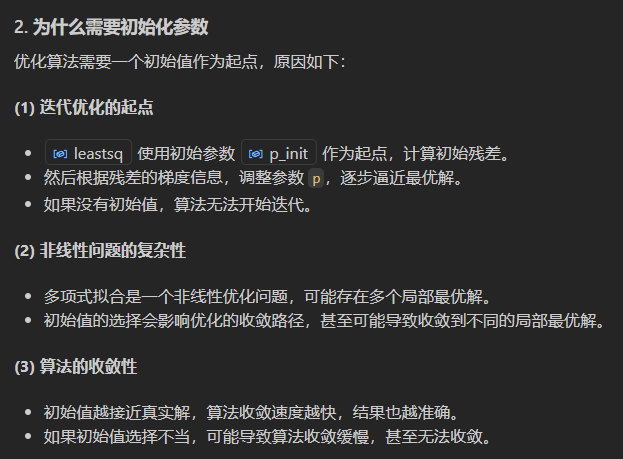

### M=0

Fitting Parameters: [0.07380232]
Fitting Parameters with new polynomial: [0.07380232]


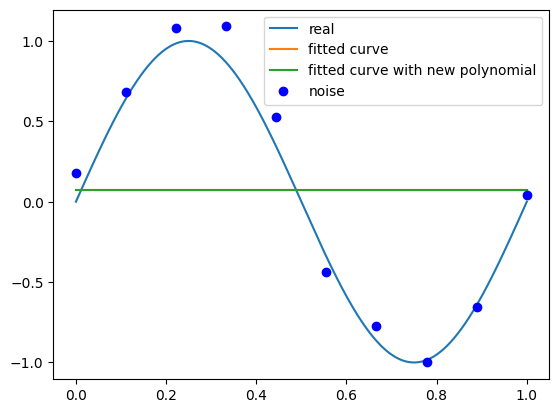

In [ ]:
# M=0
p_lsq_0,p_lsq_new_0 = fitting(M=0)

# 可以看出，M=0的时候，拟合的多项式实际上就是一个常数项，也就是一条水平线，这个时候拟合的效果并不好，因为正弦函数是一个非线性函数
# 而且我们可以看出，新版的多项式拟合和旧版的拟合结果是一样的，因为拟合的多项式次数是一样的，只不过初始化参数的方式不同，初始化参数的方式不同并没有影响最终拟合的结果

### M=1

Fitting Parameters: [-1.50188406  0.82474434]
Fitting Parameters with new polynomial: [ 0.82474434 -1.50188405]


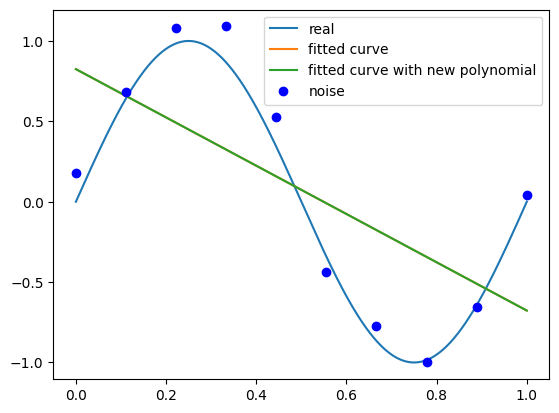

In [30]:
# M=1
p_lsq_1,p_lsq_new_1 = fitting(M=1)

Fitting Parameters: [-0.00980768 -1.49207662  0.8232914 ]
Fitting Parameters with new polynomial: [ 0.82329145 -1.49207662 -0.00980748]


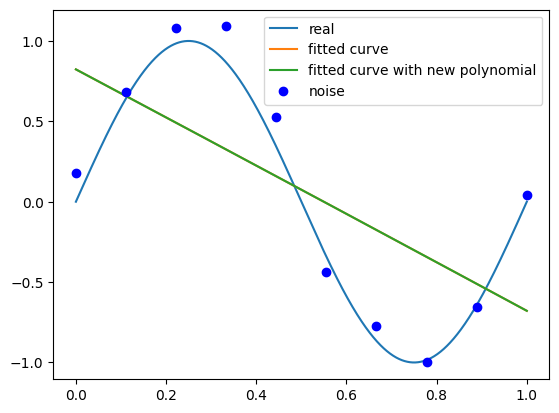

In [ ]:
# M=2
p_lsq_2,p_lsq_new_2 = fitting(M=2)

# 其实几乎看不出来二次项

### M=3 

Fitting Parameters: [ 21.98151736 -32.98208392  11.01839235   0.0634364 ]
Fitting Parameters with new polynomial: [  0.0634364   11.01839244 -32.98208421  21.98151756]


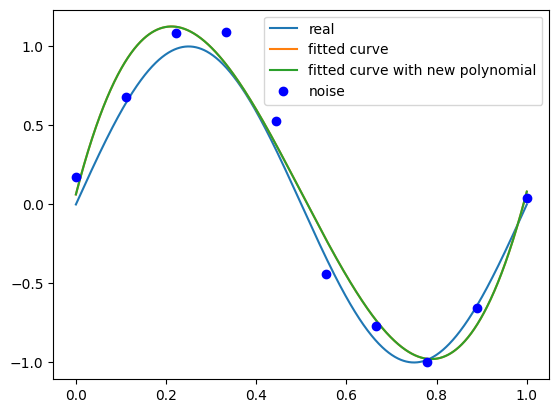

In [32]:
# M=3
p_lsq_3,p_lsq_new_3 = fitting(M=3)

### M=9

Fitting Parameters: [-3.07322957e+04  1.35079645e+05 -2.48114141e+05  2.47118667e+05
 -1.44912911e+05  5.08844988e+04 -1.03921165e+04  1.11051137e+03
 -4.19938626e+01  1.76405235e-01]
Fitting Parameters with new polynomial: [ 1.76405235e-01 -4.19938626e+01  1.11051137e+03 -1.03921165e+04
  5.08844988e+04 -1.44912911e+05  2.47118667e+05 -2.48114141e+05
  1.35079645e+05 -3.07322957e+04]


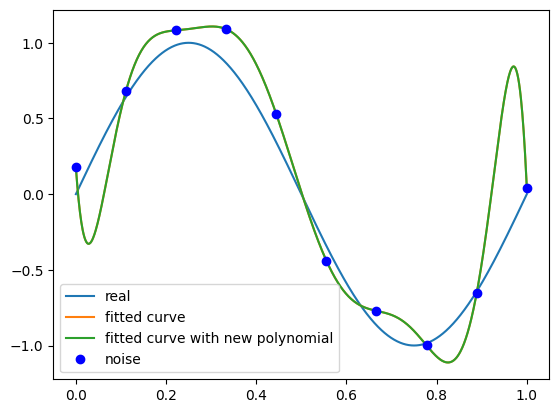

In [20]:
# M=9
p_lsq_9,p_lsq_new_9 = fitting(M=9)

当M=9时，多项式曲线通过了每个数据点，但是造成了过拟合

Fitting Parameters for fitting polynomial order of 0: [0.07380232]
Fitting Parameters with new polynomial for fitting polynomial order of 0: [0.07380232]


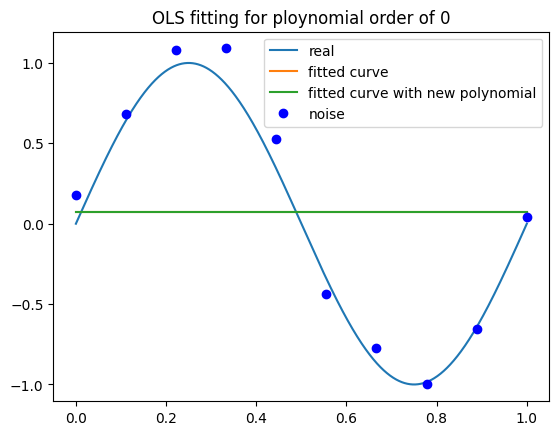

Fitting Parameters for fitting polynomial order of 1: [-1.50188406  0.82474435]
Fitting Parameters with new polynomial for fitting polynomial order of 1: [ 0.82474435 -1.50188406]


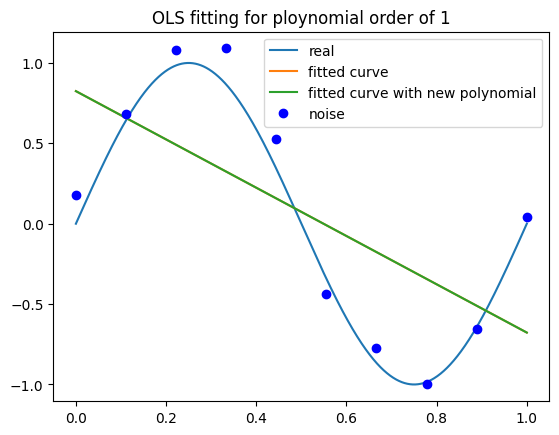

Fitting Parameters for fitting polynomial order of 2: [-0.00980677 -1.49207728  0.82329148]
Fitting Parameters with new polynomial for fitting polynomial order of 2: [ 0.8232914  -1.4920765  -0.00980757]


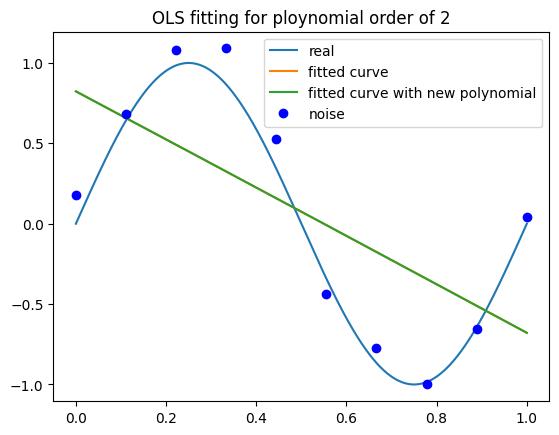

Fitting Parameters for fitting polynomial order of 3: [ 21.98151741 -32.98208398  11.01839236   0.06343641]
Fitting Parameters with new polynomial for fitting polynomial order of 3: [  0.06343641  11.01839239 -32.98208406  21.98151746]


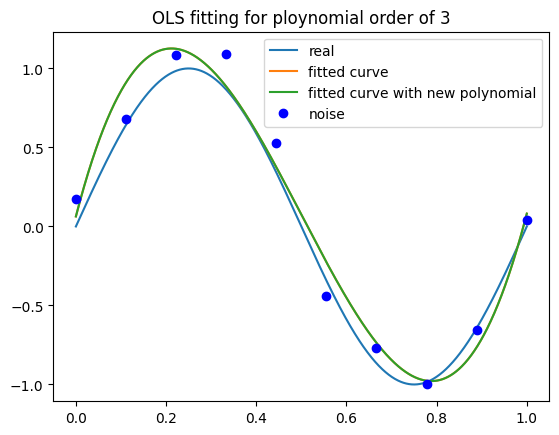

Fitting Parameters for fitting polynomial order of 4: [  4.21948345  13.5425504  -27.72075261   9.97654453   0.09121902]
Fitting Parameters with new polynomial for fitting polynomial order of 4: [  0.09121907   9.97654284 -27.7207444   13.5425376    4.21948972]


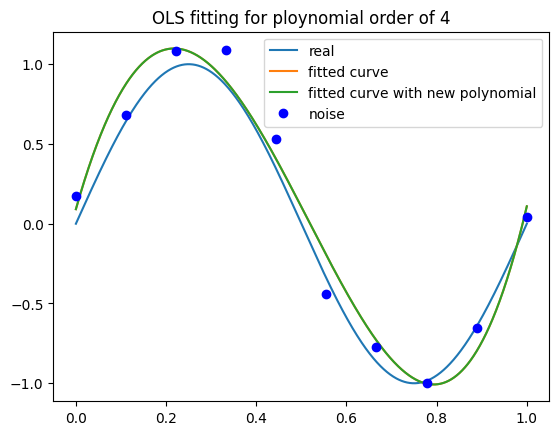

Fitting Parameters for fitting polynomial order of 5: [-7.93035997e+01  2.02478493e+02 -1.59424169e+02  3.34703093e+01
  2.63563064e+00  1.71799890e-01]
Fitting Parameters with new polynomial for fitting polynomial order of 5: [ 1.71799868e-01  2.63563241e+00  3.34702949e+01 -1.59424129e+02
  2.02478447e+02 -7.93035815e+01]


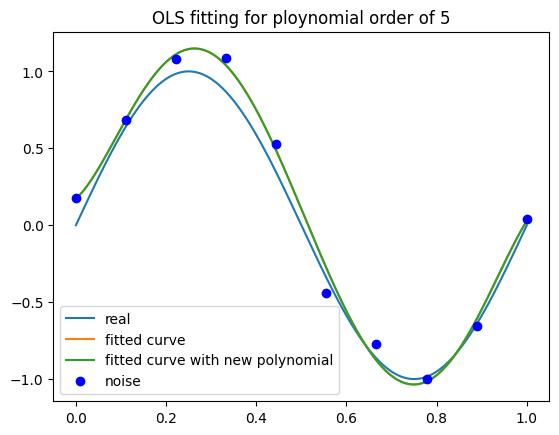

Fitting Parameters for fitting polynomial order of 6: [ 8.69314537e+01 -3.40097981e+02  4.95664875e+02 -3.11139608e+02
  6.87194197e+01 -2.21495155e-01  1.82506807e-01]
Fitting Parameters with new polynomial for fitting polynomial order of 6: [ 1.82506759e-01 -2.21508562e-01  6.87196109e+01 -3.11140484e+02
  4.95666630e+02 -3.40099578e+02  8.69319943e+01]


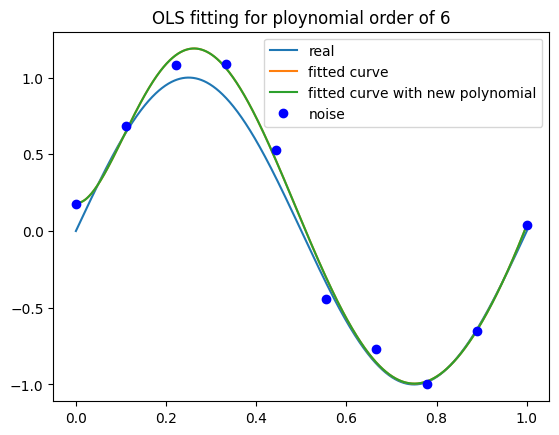

Fitting Parameters for fitting polynomial order of 7: [ 4.15023603e+02 -1.36565137e+03  1.66151462e+03 -8.76909224e+02
  1.74287416e+02 -1.31385718e+01  4.73936356e+00  1.77919366e-01]
Fitting Parameters with new polynomial for fitting polynomial order of 7: [ 1.77919561e-01  4.73923777e+00 -1.31365768e+01  1.74275919e+02
 -8.76877465e+02  1.66146925e+03 -1.36561906e+03  4.15014539e+02]


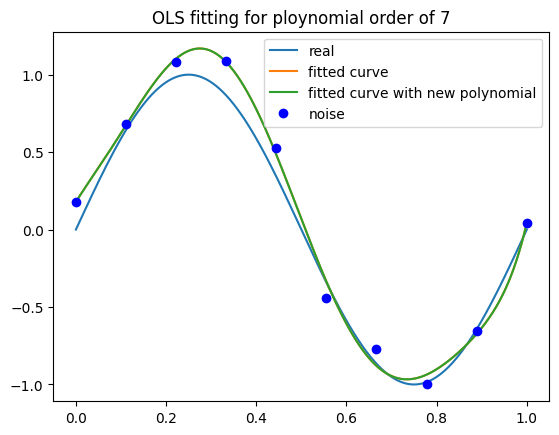

Fitting Parameters for fitting polynomial order of 8: [-3.21594300e+03  1.32787896e+04 -2.23764577e+04  1.96707657e+04
 -9.52727853e+03  2.46732610e+03 -3.17150797e+02  1.98145082e+01
  1.75813012e-01]
Fitting Parameters with new polynomial for fitting polynomial order of 8: [ 1.75813163e-01  1.98132850e+01 -3.17126018e+02  2.46713838e+03
 -9.52656754e+03  1.96692802e+04 -2.23747193e+04  1.32777224e+04
 -3.21567556e+03]


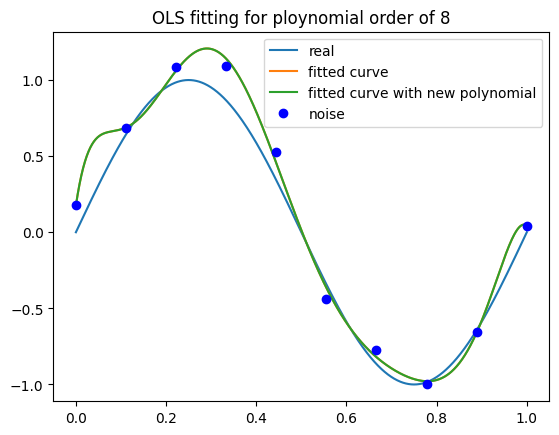

Fitting Parameters for fitting polynomial order of 9: [-3.07322957e+04  1.35079645e+05 -2.48114141e+05  2.47118667e+05
 -1.44912911e+05  5.08844988e+04 -1.03921165e+04  1.11051137e+03
 -4.19938626e+01  1.76405235e-01]
Fitting Parameters with new polynomial for fitting polynomial order of 9: [ 1.76405235e-01 -4.19938626e+01  1.11051137e+03 -1.03921165e+04
  5.08844988e+04 -1.44912911e+05  2.47118667e+05 -2.48114141e+05
  1.35079645e+05 -3.07322957e+04]


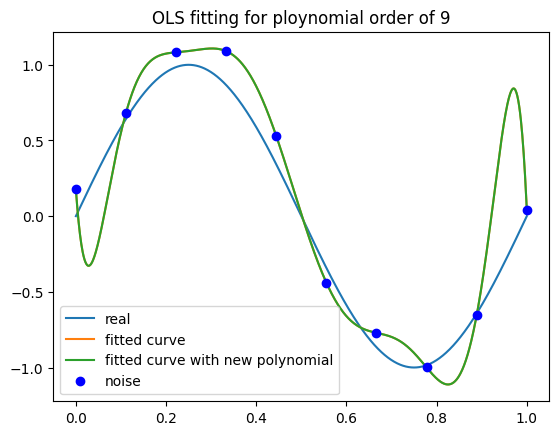

Skipping polynomial order 10 because it exceeds the maximum allowed order 9.
Skipping polynomial order 11 because it exceeds the maximum allowed order 9.
Skipping polynomial order 12 because it exceeds the maximum allowed order 9.
Skipping polynomial order 13 because it exceeds the maximum allowed order 9.
Skipping polynomial order 14 because it exceeds the maximum allowed order 9.


In [45]:
def fitting(M=0):
    """
    M    为 多项式的次数
    """
    
    # 创建一个新的图形对象，以防止多个图形重叠
    # 如果不采取措施，所有的绘图会叠加在同一个图上。这是因为 matplotlib 默认在同一个图形对象（figure）中绘制所有内容。为了保证每次绘图是独立的
    plt.figure()
    
    
    # 随机初始化多项式参数，如果次数是0，则只有一个参数，即截距，但是也需要生成1个随机系数；
    # 如果次数是1，则有两个参数，即截距和斜率，也就是是一次项的线性函数，这个时候需要生成2个随机系数，分别对应截距和斜率
    # 以此类推，如果我们要生成的是M次多项式，包括上常数项，我们得生成M+1个随机系数
    p_init = np.random.rand(M + 1)  
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))  
    # 注意这里的p_init是多项式的系数，仅仅是用于初始化最小二乘法的参数，不是最终的拟合参数，因为最小二乘法是一个动态迭代的过程，必须得有一个初始值
    # 然后这里提供的训练集（x，y）实际上就是前面的10个数据点
    print(f'Fitting Parameters for fitting polynomial order of {M}:', p_lsq[0])
    # 然后leastsq中返回的第1个参数实际上就是最优拟合参数（实际上就是优化后的多项式系数）
    
    
    # 注意下面这一部分其实是新版的多项式的拟合，本质上和上面的是一样的，拟合都是同样次数的多项式，只不过对初始化系数的使用可能因为参数使用高低阶传入有所不同
    p_lsq_new = leastsq(residuals_func_new,p_init,args=(x,y))
    print(f'Fitting Parameters with new polynomial for fitting polynomial order of {M}:',p_lsq_new[0])


    # 可视化
    # 说白了就是上面使用10个数据点拟合出来的多项式函数，然后使用1000个数据点来展示这个拟合的多项式函数
    plt.plot(x_points, real_func(x_points), label='real') # 真实的正弦函数，1000个数据点展示
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve') # 拟合的多项式函数，1000个数据点展示，为了绘图平滑
    
    
    # 注意这里也是对应上面的新版多项式的拟合
    plt.plot(x_points,fit_func_new(p_lsq_new[0],x_points),label='fitted curve with new polynomial')
    
    
    plt.plot(x, y, 'bo', label='noise') # 蓝色的圆点，10个数据点展示
    plt.legend()
    plt.title(f"OLS fitting for ploynomial order of {M}") 
    plt.show()
    
    
    return p_lsq,p_lsq_new # 返回拟合的多项式结果，具体可以查看?




# 前面的是fitting函数的定义，此处我们再写一个函数，用于展示不同次数多项式的拟合效果，这样可以更加直观的看出不同次数多项式的拟合效果
def fitting_batch(M=[0]):
    
    """
    Args:
    M ——> list，多项式次数的list
    
    Returns:
    对于M list中的每一个次数，都会进行一次拟合，并展示拟合的plot效果
    同时返回所有拟合的多项式参数
    """
    max_order = len(x) - 1  # 最大允许的多项式次数，从训练数据的10个参考
    for polynomial_order in M:
        if polynomial_order > max_order:
            print(f"Skipping polynomial order {polynomial_order} because it exceeds the maximum allowed order {max_order}.")
            continue
        fitting(M=polynomial_order)
        
# 当然，我们其实可以将上面的两个函数合并成一个函数，这样更加简洁，但是这里为了更好的展示，我们将其分开写



fitting_batch(range(15)) # 然后注意，因为我们训练集中只有10个数据点，所以我们最多只能拟合出9次多项式（包括常数项为10），再多了就没办法解方程了
        

训练集数据的维度必须要大于要拟合的模型中待估计的参数的维度；

在上面这个回归曲线的拟合（或者说从数据点中去推断一个回归模型）的时候，对应的就是训练集sample的数目（也就是样本点的数目）必须要大于要拟合的多项式模型中待估计的项数系数的个数；

很简单，就是从解方程的角度去思考，几个数据点能够列几个方程，待估计的模型中有几个未知数，未知数和方程的个数之间的关系，即超定和欠定。

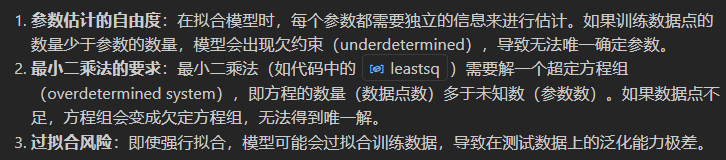

### 正则化

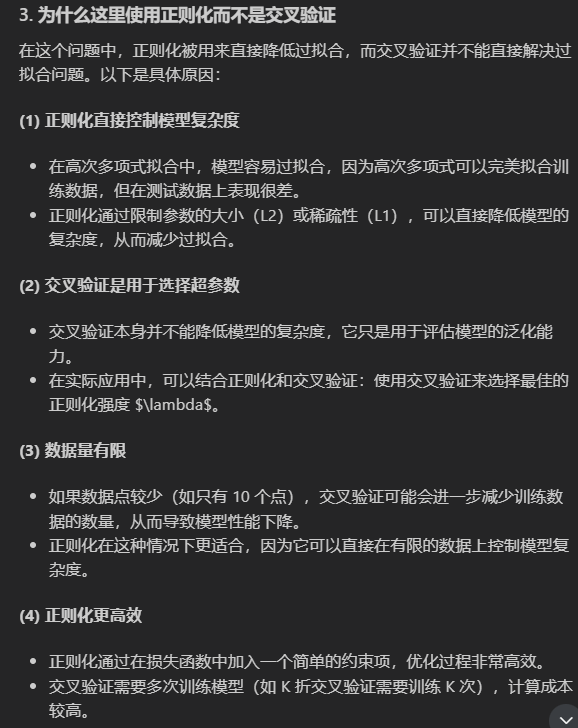

我考虑到的是此处如果使用交叉验证的话，最好是使用LOOCV，即留一法，但是本来训练集就只有10个数据点了，每次都只能用9个训练点来拟合，1个数据点来验证，这样能够拟合的最高项次数又得减少了，变成了9-1=8；

而且使用LOOCV拟合的话，因为实际上损失函数（此处使用的经验损失函数通常是所有10个模型的数学均值），实际上在训练验证过程中已经看到过了所有的训练集以及验证集了，所得出的模型的测试误差（即所谓的估计的泛化误差实际上是低估了真实的泛化误差），也就是这个模型有点问题

因为前面仅仅使用OLS推断线性多项式模型的时候明显发生了过拟合现象（随着模型复杂度即灵活度的增加，即项数系数次数的增加）

结果显示过拟合， 引入正则化项(regularizer)，降低过拟合

$Q(x)=\sum_{i=1}^n(h(x_i)-y_i)^2+\lambda||w||^2$。

回归问题中，损失函数是平方损失，正则化可以是参数向量的L2范数,也可以是L1范数。

- L1: regularization\*abs(p)

- L2: 0.5 \* regularization \* np.square(p)

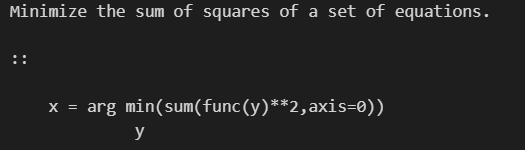

注意到前面其实定义的不是实际上的损失函数，而是定义了一个残差项

我们再回过头来看一看leastsq最小二乘法这个算法中对于回归模型残差和最小化MSE min策略的实现：

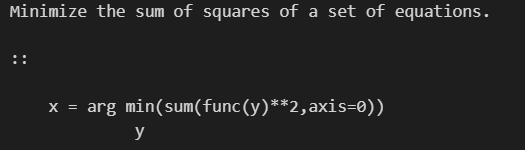

首先我们在这个函数中提供的是一个func参数，实际上就是逐数据点的残差项，所以残差平方和，我们对func先逐个数据点平方，再然后求和sum

所以如果我们不在整体损失函数上去定义正则项，而是在要细化到每一个残差项的正则化；

所以我们不能够按照整体水平的MSE去整理这个损失函数的正则项，而是应该重新处理这个正则项，在残差项中整合进去：

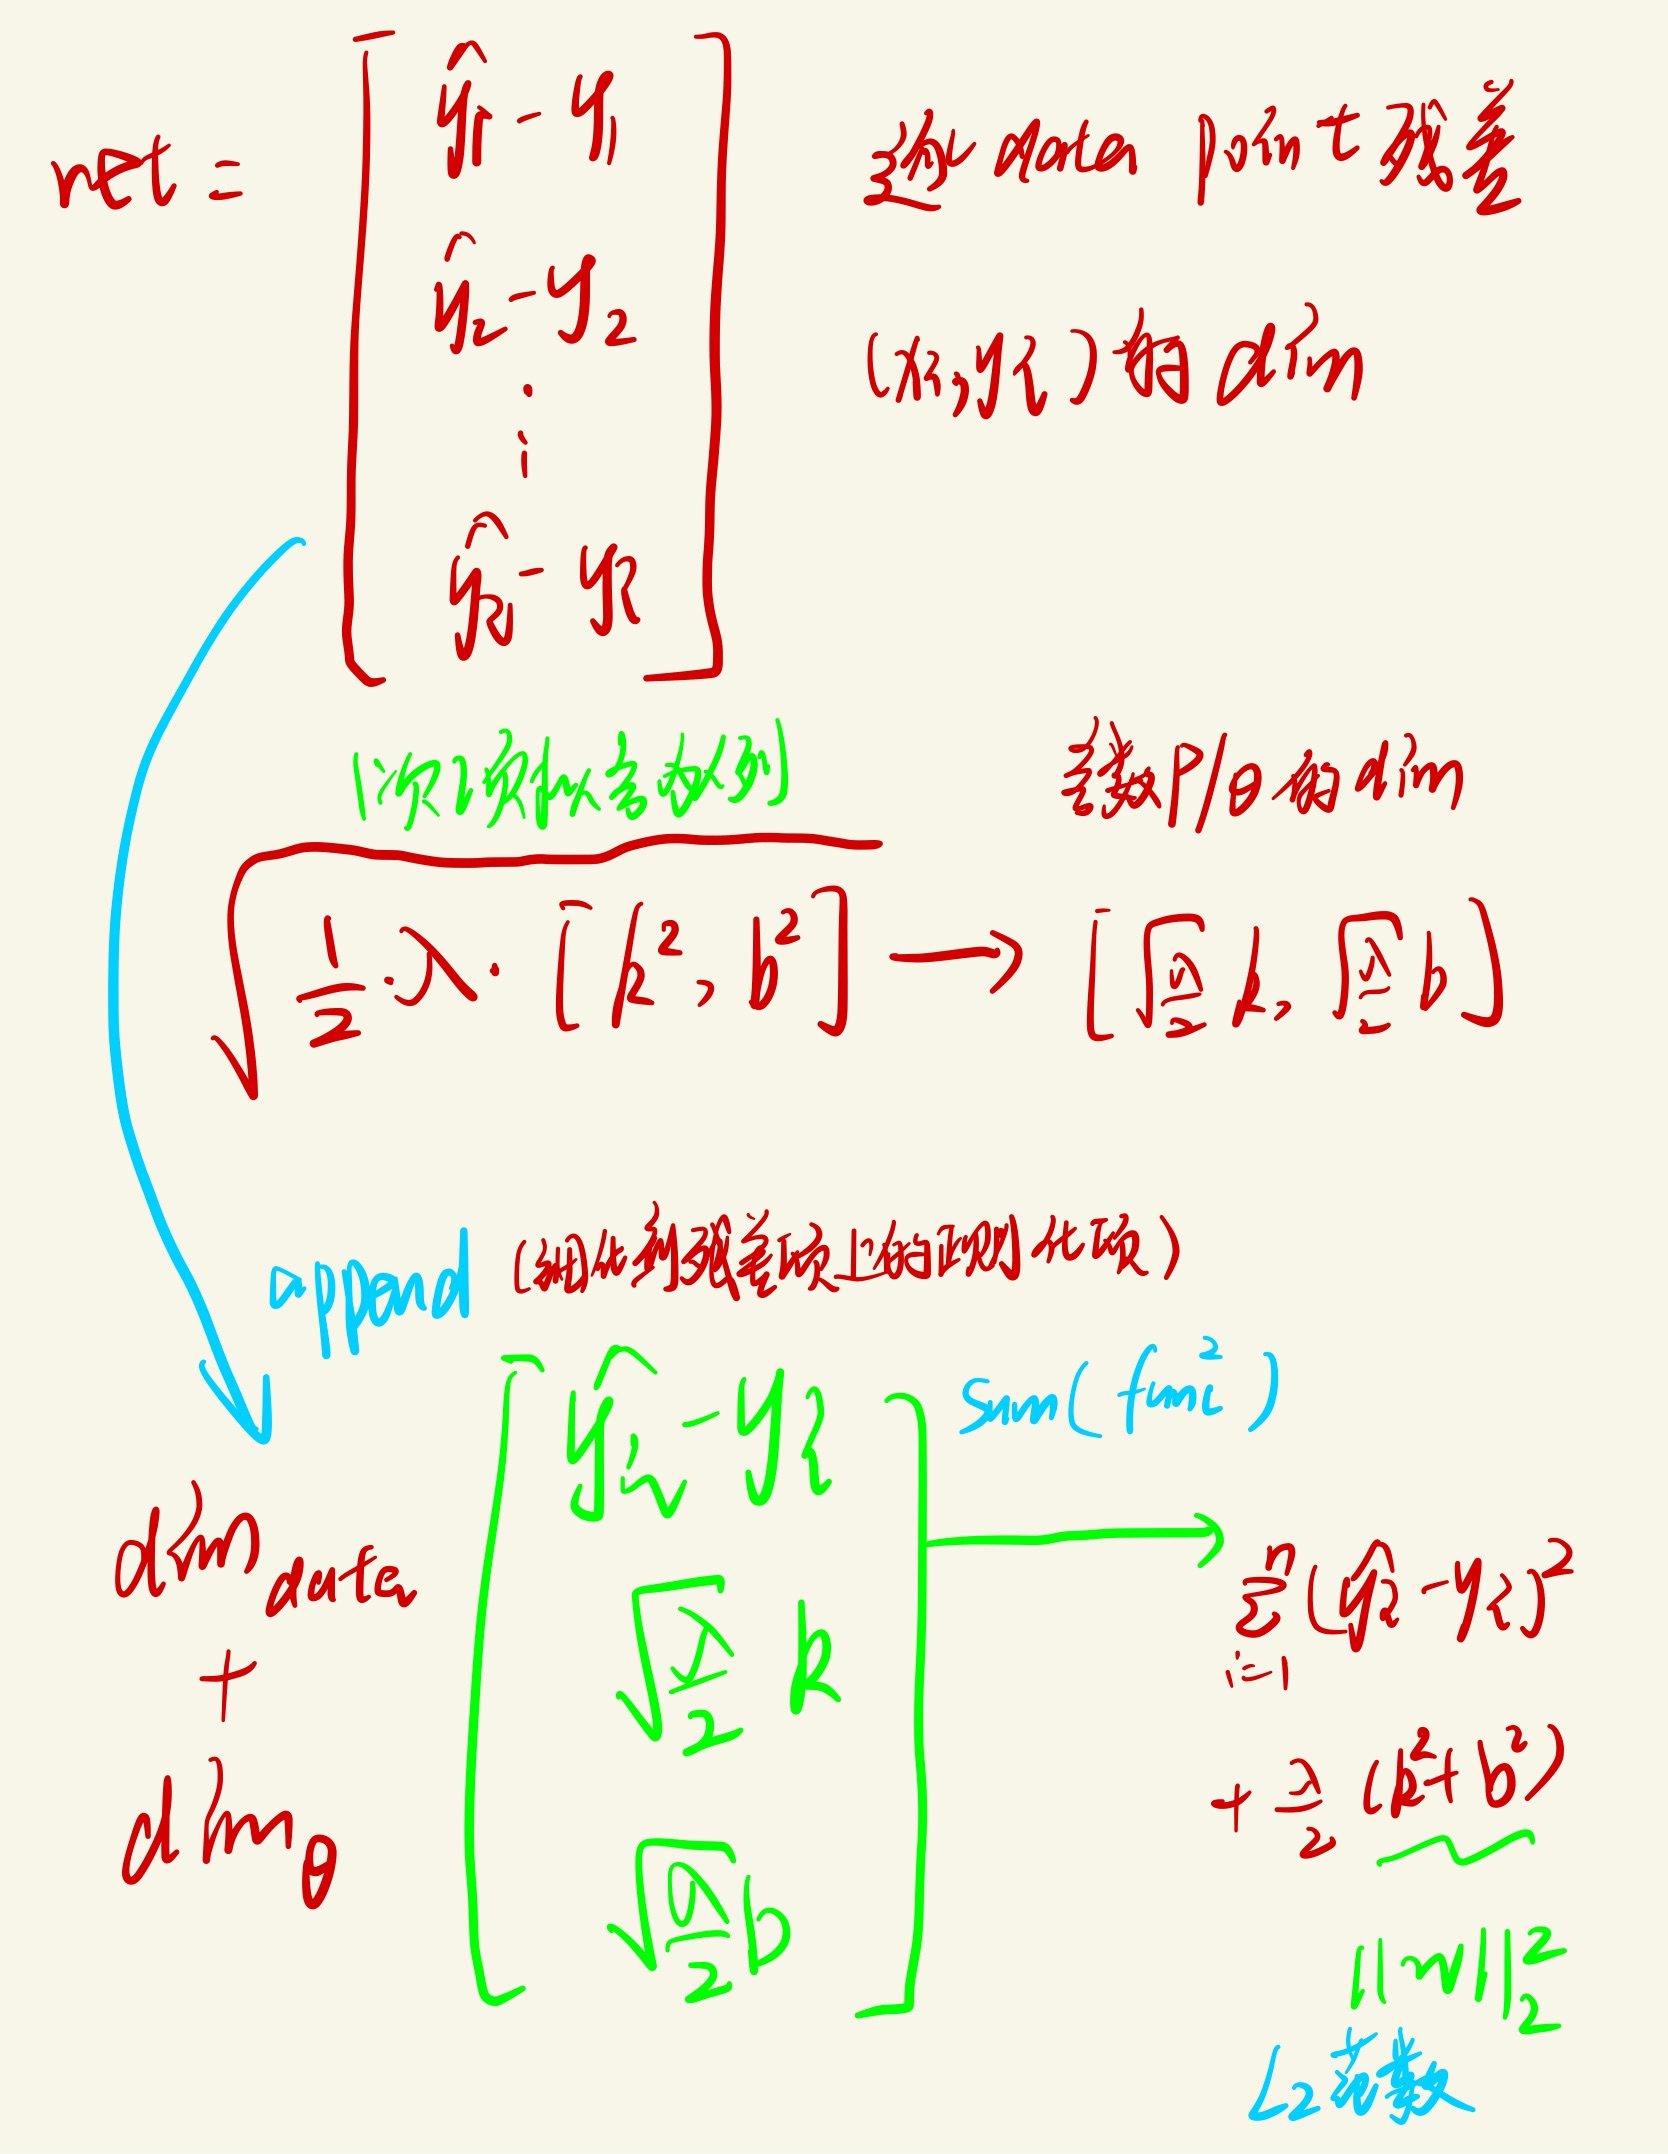


至于此处L2范数中的0.5系数，其实不是关键，系数是无所谓的

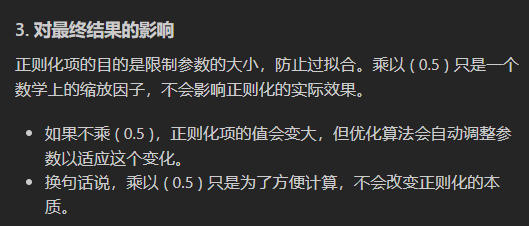

In [12]:
regularization = 0.0001
# 至于这里的正则化项乘不乘0.5，其实是无所谓的，因为正则化项的目的是为了减少过拟合，而不是为了优化，所以这里的0.5只是为了方便计算，不影响最终结果


def residuals_func_regularization(p, x, y):
    ret = fit_func_new(p, x) - y  # 旧版这里是ret = fit_func(p, x) - y
    ret = np.append(ret,
                    np.sqrt(0.5 * regularization * np.square(p)))  # L2范数作为正则化项
    return ret
    
    
    # 很多人应该会写下面这种，按照的就是实际定义的公式，即参数向量平方和的平方根
    # 但是实际上因为前面的ret计算的是逐数据点的残差，注意这里是参数，并不是MSE，而MSE是我们通常优化的目标，MSE是每一个数据点的ret的平方和的均值
    # 所以上面的ret是一个参数的list，建议倒回去仔细查看一下leastsq函数定义！！！！
    # 其实上面的没有问题！！！
    
    """"
    ret = np.append(ret,
                    0.5*regularization*np.sqrt(sum(np.square(p)))) # L2范数作为正则化项
    return ret
    
    """

In [4]:
?np.square
?np.append

Signature:       np.append(arr, values, axis=None)
Call signature:  np.append(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function append at 0x759faf50ba60>
File:            ~/miniconda3/envs/r-jupyter/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py
Docstring:      
Append values to the end of an array.

Parameters
----------
arr : array_like
    Values are appended to a copy of this array.
values : array_like
    These values are appended to a copy of `arr`.  It must be of the
    correct shape (the same shape as `arr`, excluding `axis`).  If
    `axis` is not specified, `values` can be any shape and will be
    flattened before use.
axis : int, optional
    The axis along which `values` are appended.  If `axis` is not
    given, both `arr` and `values` are flattened before use.

Returns
-------
append : ndarray
    A copy of `arr` with `values` appended to `axis`.  Note that
    `append` does not occur in-place: a new array is allocated 

In [19]:
# 最小二乘法,加正则化项
# 正则项是加在残差项后面的，所以最终的残差项是残差项+正则项，其实就是原始的损失函数是经验风险，加上正则项之后就是结构风险
# 然后现在就是用OLS去最小化结构风险，这样就可以得到一个更加泛化的模型


p_init = np.random.rand(9 + 1)
p_lsq_regularization = leastsq(
    residuals_func_regularization, p_init, args=(x, y))

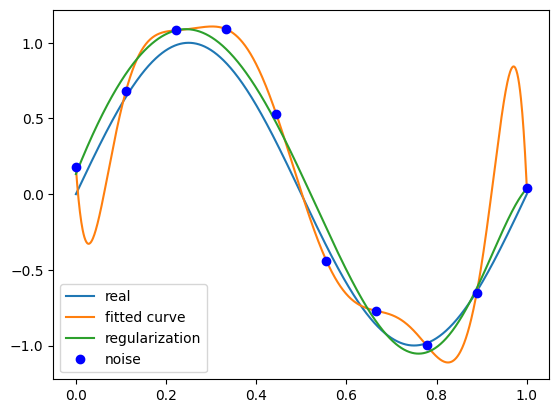

In [21]:
plt.plot(x_points, real_func(x_points), label='real') # 对应函数是sin(2πx)
plt.plot(x_points, fit_func_new(p_lsq_new_9[0], x_points), label='fitted curve')  
# 旧版这里是plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label='fitted curve')
plt.plot(
    x_points,
    fit_func_new(p_lsq_regularization[0], x_points),
    label='regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()

可以看得出来，在正则化之后，确实拟合效果上新的曲线没有通过每一个点，弱化了过拟合的效果

## 第1章统计学习方法概论-习题

**github地址：** https://github.com/datawhalechina/statistical-learning-method-solutions-manual

### 习题1.1
&emsp;&emsp;说明伯努利模型的极大似然估计以及贝叶斯估计中的统计学习方法三要素。伯努利模型是定义在取值为0与1的随机变量上的概率分布。假设观测到伯努利模型$n$次独立的数据生成结果，其中$k$次的结果为1，这时可以用极大似然估计或贝叶斯估计来估计结果为1的概率。

**解答：**

伯努利模型的极大似然估计以及贝叶斯估计中的**统计学习方法三要素**如下：  
1. **极大似然估计**  
**模型：** $\mathcal{F}=\{f|f_p(x)=p^x(1-p)^{(1-x)}\}$  
**策略：** 最大化似然函数  
**算法：** $\displaystyle \mathop{\arg\min}_{p} L(p)= \mathop{\arg\min}_{p} \binom{n}{k}p^k(1-p)^{(n-k)}$
2. **贝叶斯估计**  
**模型：** $\mathcal{F}=\{f|f_p(x)=p^x(1-p)^{(1-x)}\}$  
**策略：** 求参数期望  
**算法：**
$$\begin{aligned}  E_\pi\big[p \big| y_1,\cdots,y_n\big]
& = {\int_0^1}p\pi (p|y_1,\cdots,y_n) dp \\
& = {\int_0^1} p\frac{f_D(y_1,\cdots,y_n|p)\pi(p)}{\int_{\Omega}f_D(y_1,\cdots,y_n|p)\pi(p)dp}dp \\
& = {\int_0^1}\frac{p^{k+1}(1-p)^{(n-k)}}{\int_0^1 p^k(1-p)^{(n-k)}dp}dp
\end{aligned}$$

**伯努利模型的极大似然估计：**  
定义$P(Y=1)$概率为$p$，可得似然函数为：$$L(p)=f_D(y_1,y_2,\cdots,y_n|\theta)=\binom{n}{k}p^k(1-p)^{(n-k)}$$方程两边同时对$p$求导，则：$$\begin{aligned}
0 & = \binom{n}{k}[kp^{k-1}(1-p)^{(n-k)}-(n-k)p^k(1-p)^{(n-k-1)}]\\
& = \binom{n}{k}[p^{(k-1)}(1-p)^{(n-k-1)}(m-kp)]
\end{aligned}$$可解出$p$的值为$p=0,p=1,p=k/n$，显然$\displaystyle P(Y=1)=p=\frac{k}{n}$  

**伯努利模型的贝叶斯估计：**  
定义$P(Y=1)$概率为$p$，$p$在$[0,1]$之间的取值是等概率的，因此先验概率密度函数$\pi(p) = 1$，可得似然函数为： $$L(p)=f_D(y_1,y_2,\cdots,y_n|\theta)=\binom{n}{k}p^k(1-p)^{(n-k)}$$  
根据似然函数和先验概率密度函数，可以求解$p$的条件概率密度函数：$$\begin{aligned}\pi(p|y_1,\cdots,y_n)&=\frac{f_D(y_1,\cdots,y_n|p)\pi(p)}{\int_{\Omega}f_D(y_1,\cdots,y_n|p)\pi(p)dp}\\
&=\frac{p^k(1-p)^{(n-k)}}{\int_0^1p^k(1-p)^{(n-k)}dp}\\
&=\frac{p^k(1-p)^{(n-k)}}{B(k+1,n-k+1)}
\end{aligned}$$所以$p$的期望为：$$\begin{aligned}
E_\pi[p|y_1,\cdots,y_n]&={\int}p\pi(p|y_1,\cdots,y_n)dp \\
& = {\int_0^1}\frac{p^{(k+1)}(1-p)^{(n-k)}}{B(k+1,n-k+1)}dp \\
& = \frac{B(k+2,n-k+1)}{B(k+1,n-k+1)}\\
& = \frac{k+1}{n+2}
\end{aligned}$$
$\therefore \displaystyle P(Y=1)=\frac{k+1}{n+2}$

### 习题1.2
&emsp;&emsp;通过经验风险最小化推导极大似然估计。证明模型是条件概率分布，当损失函数是对数损失函数时，经验风险最小化等价于极大似然估计。

**解答：**

假设模型的条件概率分布是$P_{\theta}(Y|X)$，现推导当损失函数是对数损失函数时，极大似然估计等价于经验风险最小化。
极大似然估计的似然函数为：$$L(\theta)=\prod_D P_{\theta}(Y|X)$$两边取对数：$$\ln L(\theta) = \sum_D \ln P_{\theta}(Y|X) \\ 
\mathop{\arg \max}_{\theta} \sum_D \ln P_{\theta}(Y|X) = \mathop{\arg \min}_{\theta} \sum_D (- \ln P_{\theta}(Y|X))$$ 
反之，经验风险最小化等价于极大似然估计，亦可通过经验风险最小化推导极大似然估计。